## Introduction

In the following notebook, I will be preparing Listings data pertaining to San Francisco Airbnb's. Raw data can be found [here](http://insideairbnb.com/get-the-data.html).


**Read in libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Set notebook preferences**

In [2]:
#Set options for pandas
pd.set_option('display.max_columns',1_000)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', 200)

#Set style for plot
plt.style.use('ggplot')

#Set path to visuals from EDA
visualizations = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Visualizations\Exploratory_Data_Analysis'

**Read in data**

In [3]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\02_Cleaned'

#Read in data
df = pd.read_csv(path + '/2020_0715_Listings_Cleaned.csv', parse_dates=['last_review'],
                 dtype = {'zipcode':'object'}
                )

### Data Overview

In [4]:
#Preview data
print('Data shape:',df.shape)
display(df.head(3))

Data shape: (126258, 48)


,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,cancellation_policy,city,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_name,host_response_rate,host_response_time,host_verifications,id,instant_bookable,is_location_exact,last_review,latitude,longitude,maximum_nights,minimum_nights,monthly_price,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekly_price,zipcode
0,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets live on this property ,Dog(s),Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , First aid kit ,Essentials,Shampoo, ...",0,77,0,1,1.0,Real Bed,1.0,2.0,1,0.0,0.0,moderate,San Francisco,100.0,25.0,2,1.0,1169,1.0,1.0,Holly,100.0,within an hour,"email , phone , facebook , reviews , kba",958,1,1,2019-03-16,37.76931,-122.43386,30,1,4200.0,Western Addition,183,170.0,Apartment,0,0,1,97.0,1.55,Entire home/apt,100.0,1120.0,94117
1,2,"TV,Internet,Wifi,Kitchen, Free street parking ,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , Fire extinguisher , Lock on bedroom door , Private entrance ...",30,365,60,90,4.0,Real Bed,1.0,1.0,9,9.0,0.0,strict 14 with grace period,San Francisco,50.0,12.0,1,1.0,21994,1.0,0.0,Aaron,100.0,within a few hours,"email , phone , reviews , jumio , government id",8142,0,1,2018-09-12,37.76487,-122.45183,90,32,1685.0,Haight Ashbury,8,65.0,Apartment,0,0,1,93.0,0.14,Private room,200.0,490.0,94117
2,5,"TV,Internet,Wifi,Kitchen,Heating, Family/kid friendly , Smoke detector , Carbon monoxide detector , First aid kit , Safety card , Fire extinguisher",30,90,60,90,1.5,Real Bed,2.0,2.0,2,0.0,0.0,strict 14 with grace period,San Francisco,225.0,150.0,2,1.0,24215,1.0,0.0,Rosy,100.0,within an hour,"email , phone , reviews , kba",8339,0,1,2018-08-11,37.77525,-122.43637,1125,7,NaN,Western Addition,27,785.0,House,1,1,1,97.0,0.23,Entire home/apt,0.0,NaN,94117


### Quick EDA

**Price Distribution**

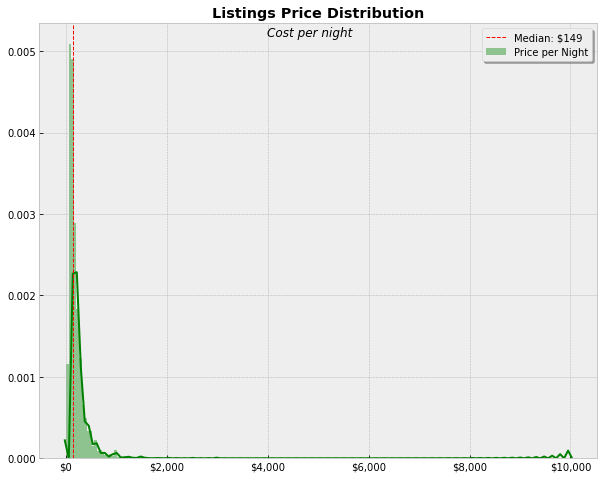

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(filename= visualizations +  '/price_hist.png', width=700, height=400)

**Price by Month**

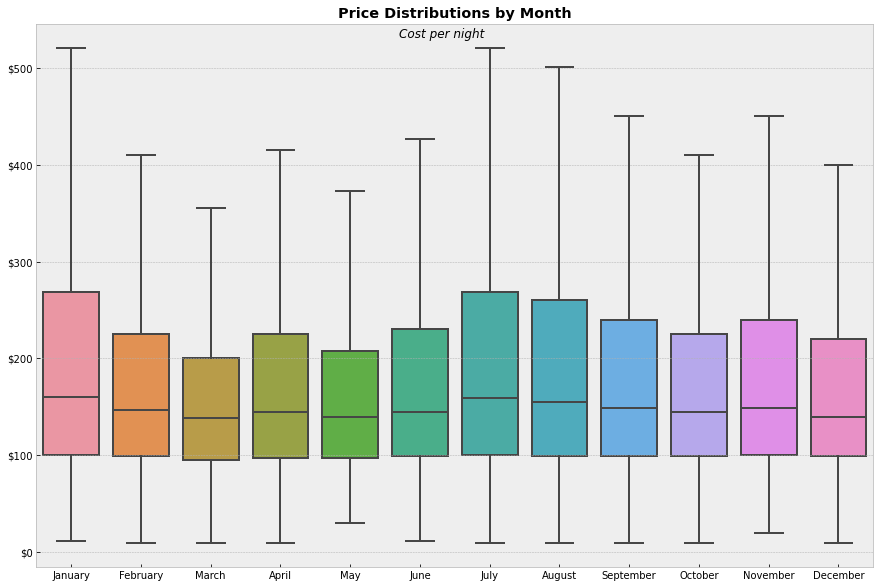

In [6]:
Image(filename= visualizations +  '/month_price_box.png', width=700, height=400)

**Price by Day**

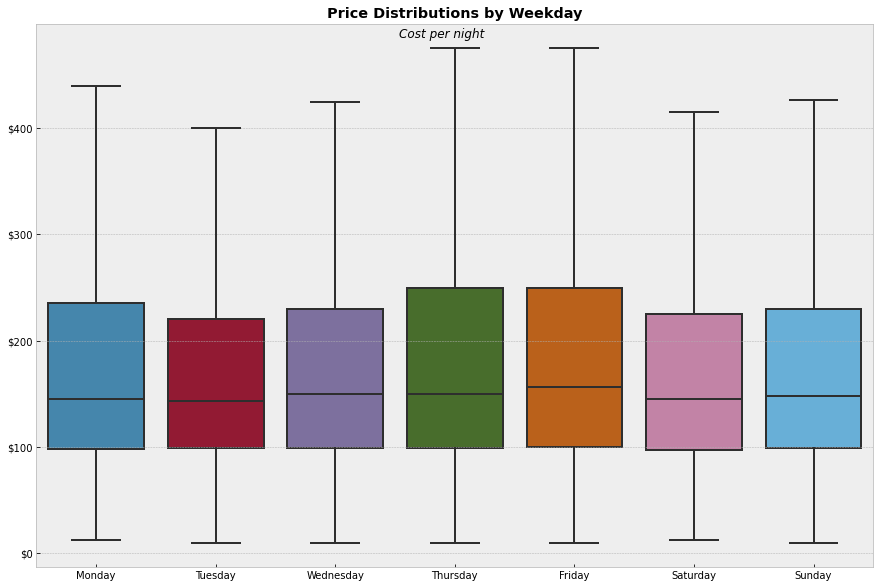

In [7]:
Image(filename= visualizations +  '/weekday_price_box.png', width=700, height=400)

### Preprocessing

#### Drop Unnecessary columns

In [8]:
#Cols not needed for machine learning
cols =['host_id','id','city', 'host_name','cancellation_policy','calculated_host_listings_count',
       'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
       'weekly_price', 'monthly_price','zipcode','host_verifications']

#Drop cols
df.drop(cols, axis = 1, inplace = True)

### Feature Engineering

**Extract and Encode date information**

In [9]:
#Extract time data from datetime64 cols
for col in df.select_dtypes('datetime64'):
    df[col + '_year'] = df[col].dt.year.astype('object')
    df[col + '_month'] = df[col].dt.month_name()
    df[col + '_weekday'] = df[col].dt.day_name()

#Create Flags for Holidays and Weekends
#Import library for holiday flag
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

#Init calendar
cal = calendar()
holidays = cal.holidays(start=df.last_review.min(), end=df.last_review.max())

#Create holiday flag
df['holiday'] = df['last_review'].isin(holidays)

#Create weekend flag
df['weekend'] = df['last_review_weekday'].apply(lambda x: True if (x == 'Saturday')|(x == 'Sunday') else False)

#Drop last_review
df.drop('last_review', axis = 1, inplace = True)

#Check
display(df.head())

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,instant_bookable,is_location_exact,latitude,longitude,maximum_nights,minimum_nights,neighbourhood_cleansed,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,last_review_year,last_review_month,last_review_weekday,holiday,weekend
0,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets live on this property ,Dog(s),Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , First aid kit ,Essentials,Shampoo, ...",0,77,0,1,1.0,Real Bed,1.0,2.0,100.0,25.0,2,1.0,1.0,1.0,100.0,within an hour,1,1,37.76931,-122.43386,30,1,Western Addition,183,170.0,Apartment,0,0,1,97.0,1.55,Entire home/apt,100.0,2019,March,Saturday,False,True
1,2,"TV,Internet,Wifi,Kitchen, Free street parking ,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , Fire extinguisher , Lock on bedroom door , Private entrance ...",30,365,60,90,4.0,Real Bed,1.0,1.0,50.0,12.0,1,1.0,1.0,0.0,100.0,within a few hours,0,1,37.76487,-122.45183,90,32,Haight Ashbury,8,65.0,Apartment,0,0,1,93.0,0.14,Private room,200.0,2018,September,Wednesday,False,False
2,5,"TV,Internet,Wifi,Kitchen,Heating, Family/kid friendly , Smoke detector , Carbon monoxide detector , First aid kit , Safety card , Fire extinguisher",30,90,60,90,1.5,Real Bed,2.0,2.0,225.0,150.0,2,1.0,1.0,0.0,100.0,within an hour,0,1,37.77525,-122.43637,1125,7,Western Addition,27,785.0,House,1,1,1,97.0,0.23,Entire home/apt,0.0,2018,August,Saturday,False,True
3,6,"TV, Cable TV ,Internet,Wifi,Kitchen, Free parking on premises , Pets allowed , Free street parking ,Heating, Family/kid friendly ,Washer,Dryer, Smoke detector , Carbon monoxide detector , First a...",0,20,5,9,1.0,Real Bed,2.0,3.0,125.0,0.0,1,1.0,0.0,0.0,90.0,within a day,0,1,37.78471,-122.44555,365,2,Western Addition,32,255.0,Apartment,0,0,1,90.0,0.27,Entire home/apt,0.0,2019,March,Saturday,False,True
4,3,"TV, Cable TV ,Internet,Wifi, Paid parking off premises , Pets live on this property ,Dog(s), Indoor fireplace ,Heating, Family/kid friendly , Smoke detector , Carbon monoxide detector , First aid...",4,131,19,42,1.0,Real Bed,1.0,2.0,50.0,60.0,2,1.0,0.0,1.0,100.0,within an hour,1,1,37.75919,-122.42237,14,1,Mission,656,139.0,Condominium,0,0,1,98.0,5.57,Private room,0.0,2019,March,Saturday,False,True


In [10]:
#Get list of cols with time data we want to encode
cols = df.filter(regex='last_review').columns

#Init empty dictionary
encodings = {}

#Create dictionary of encodings by doing a groupby on col to get avg price for value
for col in cols:
    encodings[col] = dict(df.groupby(col)['price'].mean())

#Run a loop that appends encoded values to df
for k,v in encodings.items():
    df[k + '_encoded'] = df[k].map(v)

#Drop cols from df
df.drop(cols, axis = 1, inplace = True)

#Check
display(df.filter(regex='last_review').head())

,last_review_year_encoded,last_review_month_encoded,last_review_weekday_encoded
0,211.675357,198.408435,202.01135
1,214.231945,207.743617,207.17697
2,214.231945,219.271175,202.01135
3,211.675357,198.408435,202.01135
4,211.675357,198.408435,202.01135


**Encode Neighborhoods**

In [11]:
#init dict
encode = {}

#Store encodings which will be mean price for each neighborhood
encode['neighbourhood_cleansed'] = df.groupby('neighbourhood_cleansed')['price'].mean()

#Map
for k,v in encode.items():
    df[k + '_encoded'] = df[k].map(v)
    
#Drop cols from df
df.drop('neighbourhood_cleansed', axis = 1, inplace = True)

#Check
display(df.filter(regex='neighbourhood_cleansed').head(15))   

,neighbourhood_cleansed_encoded
0,253.859019
1,209.221924
2,253.859019
3,253.859019
4,215.286303
5,238.333990
6,215.286303
7,209.221924
8,253.859019
9,187.306019


**Add amenities_count**

In [12]:
#Get a count of amenities
df['amenities_count'] = df['amenities'].str.count(',') + 1 #count commas and add 1 for last word

#Drop amenities column, host_verifications,None. Sort cols alphabetically
df.drop(columns = ['amenities'],axis = 1, inplace = True)
df = df.reindex(sorted(df.columns), axis = 1)

#Check size of df
print(df.shape)

(126258, 40)


**Remove outliers**

In [13]:
#Calculate IQR
q1,q3 = np.quantile(df.price, [.25,.75])
IQR = q3 - q1

#Set upper and lower limits for outliers to be removed
upper = q3 + (IQR * 1.5)
lower = q1 - (IQR * 1.5)

print('Length of df w/ outliers:',len(df))
print('Length of df w/o outliers:',len(df.loc[df.price <= upper]))

df = df.loc[df.price <= upper]

Length of df w/ outliers: 126258
Length of df w/o outliers: 116180


**Check data**

In [14]:
#Check data before writing to csv
print('Data shape:',df.shape)
display(df.head())

Data shape: (116180, 40)


,accommodates,amenities_count,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,cleaning_fee,extra_people,guests_included,holiday,host_has_profile_pic,host_identity_verified,host_is_superhost,host_response_rate,host_response_time,instant_bookable,is_location_exact,last_review_month_encoded,last_review_weekday_encoded,last_review_year_encoded,latitude,longitude,maximum_nights,minimum_nights,neighbourhood_cleansed_encoded,number_of_reviews,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_rating,reviews_per_month,room_type,security_deposit,weekend
0,3,26,0,77,0,1,1.0,Real Bed,1.0,2.0,100.0,25.0,2,False,1.0,1.0,1.0,100.0,within an hour,1,1,198.408435,202.011350,211.675357,37.76931,-122.43386,30,1,253.859019,183,170.0,Apartment,0,0,1,97.0,1.55,Entire home/apt,100.0,True
1,2,16,30,365,60,90,4.0,Real Bed,1.0,1.0,50.0,12.0,1,False,1.0,1.0,0.0,100.0,within a few hours,0,1,207.743617,207.176970,214.231945,37.76487,-122.45183,90,32,209.221924,8,65.0,Apartment,0,0,1,93.0,0.14,Private room,200.0,False
3,6,33,0,20,5,9,1.0,Real Bed,2.0,3.0,125.0,0.0,1,False,1.0,0.0,0.0,90.0,within a day,0,1,198.408435,202.011350,211.675357,37.78471,-122.44555,365,2,253.859019,32,255.0,Apartment,0,0,1,90.0,0.27,Entire home/apt,0.0,True
4,3,34,4,131,19,42,1.0,Real Bed,1.0,2.0,50.0,60.0,2,False,1.0,0.0,1.0,100.0,within an hour,1,1,198.408435,202.011350,211.675357,37.75919,-122.42237,14,1,215.286303,656,139.0,Condominium,0,0,1,98.0,5.57,Private room,0.0,True
5,2,23,14,311,21,44,1.0,Real Bed,1.0,1.0,50.0,0.0,1,False,1.0,1.0,0.0,100.0,within an hour,0,1,198.408435,235.134789,211.675357,37.76259,-122.40543,365,1,238.333990,457,135.0,House,0,0,1,94.0,3.98,Private room,2.0,False


**Write to CSV**

In [15]:
#Set path to save files
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Airbnb - San Francisco Listings Analysis\Data\03_Processed'

#Write files
df.to_csv(path + '/2020_0715_Listings_Processed.csv')